# Oil-Equity Correlation

In [5]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
API_TOKEN = os.environ.get("API_TOKEN")
import quandl
quandl.ApiConfig.api_key = API_TOKEN

In [6]:
cl = quandl.get("CHRIS/CME_QM1")
es = quandl.get("CHRIS/CME_ES1")

In [7]:
cl.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2018-09-14,68.775,69.900,67.950,69.000,0.40,68.99,18017.0,1569.0
2018-09-17,69.000,69.725,68.525,68.775,0.08,68.91,12376.0,1468.0
2018-09-18,68.800,70.425,68.525,69.750,0.94,69.85,10614.0,1216.0
2018-09-19,69.675,71.150,69.650,71.125,1.27,71.12,1220.0,1052.0
2018-09-20,70.975,71.350,70.050,70.175,0.45,70.32,13989.0,1775.0


In [8]:
es.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,5378.000000,5378.000000,5378.000000,5378.000000,1133.000000,5378.000000,5.378000e+03,5.378000e+03
mean,1448.612402,1458.846411,1437.936036,1449.159174,12.077229,1449.142055,1.113573e+06,1.610987e+06
std,473.406215,473.986024,473.034465,473.867676,12.757965,473.847481,9.239922e+05,1.184029e+06
min,674.750000,694.750000,665.750000,676.000000,0.250000,676.000000,0.000000e+00,0.000000e+00
25%,1125.500000,1133.500000,1117.500000,1125.750000,3.500000,1125.750000,2.784540e+05,3.442220e+05
50%,1309.250000,1319.000000,1300.250000,1309.125000,8.500000,1309.125000,9.857395e+05,1.825976e+06
75%,1608.875000,1623.625000,1599.562500,1609.750000,17.000000,1609.750000,1.707827e+06,2.776024e+06
max,2915.750000,2935.750000,2908.250000,2935.250000,149.000000,2934.000000,6.285917e+06,3.594453e+06


In [9]:
es_settle = es.Settle
cl_settle = cl.Settle
cl_settle.head()

Date
2014-03-05    101.45
2014-03-06    101.56
2014-03-07    102.58
2014-03-11    100.03
2014-03-12     97.99
Name: Settle, dtype: float64

Populating the interactive namespace from numpy and matplotlib


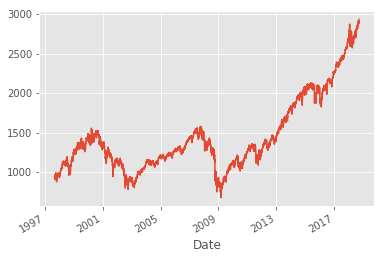

In [10]:
# use new pretty plots
matplotlib.style.use('ggplot')
# get ipython notebook to show graphs
%pylab inline

es_settle.plot()

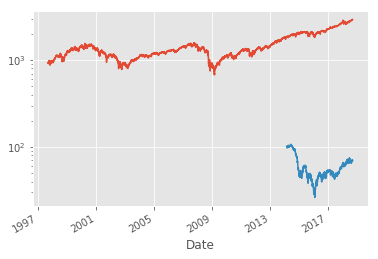

In [11]:
plt.figure()
es_settle.plot()
cl_settle.plot()
plt.yscale('log')

In [12]:
es_settle.corr(cl_settle)

-0.08497378802718977

252 = number of trading days?

In [13]:
es_settle.rolling(window=252).corr(other=cl_settle)

Date
1997-09-09         NaN
1997-09-10         NaN
1997-09-11         NaN
1997-09-12         NaN
1997-09-15         NaN
1997-09-16         NaN
1997-09-17         NaN
1997-09-18         NaN
1997-09-19         NaN
1997-09-22         NaN
1997-09-23         NaN
1997-09-24         NaN
1997-09-25         NaN
1997-09-26         NaN
1997-09-29         NaN
1997-09-30         NaN
1997-10-01         NaN
1997-10-02         NaN
1997-10-03         NaN
1997-10-06         NaN
1997-10-07         NaN
1997-10-08         NaN
1997-10-09         NaN
1997-10-10         NaN
1997-10-13         NaN
1997-10-14         NaN
1997-10-15         NaN
1997-10-16         NaN
1997-10-17         NaN
1997-10-20         NaN
                ...   
2018-08-09    0.832077
2018-08-10    0.830226
2018-08-13    0.828367
2018-08-14    0.825929
2018-08-15    0.822805
2018-08-16    0.819228
2018-08-17    0.815255
2018-08-20    0.811858
2018-08-21    0.807436
2018-08-22    0.804467
2018-08-23    0.801548
2018-08-24    0.798339
2018-0

In [14]:
merged = pd.concat({'es': es_settle, 'cl': cl_settle}, axis=1)
merged[merged['cl'].isnull()].head()

,cl,es
Date,,
1997-09-09,NaN,934.0
1997-09-10,NaN,915.0
1997-09-11,NaN,908.0
1997-09-12,NaN,924.0
1997-09-15,NaN,922.0


In [15]:
merged.dropna(how='any', inplace=True)
merged[merged['cl'].isnull()]

,cl,es
Date,,


In [16]:
merged.es.rolling(window=252).corr(other=merged.cl).dropna()

Date
2015-03-12   -0.763437
2015-03-13   -0.763697
2015-03-16   -0.765176
2015-03-17   -0.766395
2015-03-18   -0.768877
2015-03-19   -0.771226
2015-03-20   -0.774162
2015-03-23   -0.776963
2015-03-24   -0.779132
2015-03-25   -0.779743
2015-03-26   -0.780496
2015-03-27   -0.781077
2015-03-30   -0.782627
2015-03-31   -0.783866
2015-04-01   -0.784697
2015-04-02   -0.785989
2015-04-06   -0.787435
2015-04-07   -0.788353
2015-04-08   -0.789240
2015-04-09   -0.790284
2015-04-10   -0.791259
2015-04-13   -0.792031
2015-04-14   -0.792951
2015-04-15   -0.794299
2015-04-16   -0.794905
2015-04-17   -0.795034
2015-04-20   -0.795999
2015-04-21   -0.797717
2015-04-22   -0.798801
2015-04-23   -0.799088
                ...   
2018-08-09    0.832077
2018-08-10    0.830226
2018-08-13    0.828367
2018-08-14    0.825929
2018-08-15    0.822805
2018-08-16    0.819228
2018-08-17    0.815255
2018-08-20    0.811858
2018-08-21    0.807436
2018-08-22    0.804467
2018-08-23    0.801548
2018-08-24    0.798339
2018-0

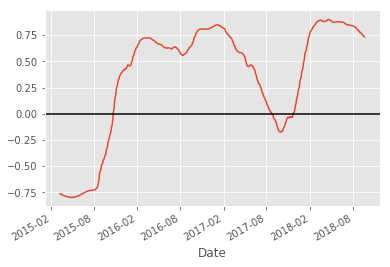

In [17]:
merged.es.rolling(window=252).corr(other=merged.cl).dropna().plot()
plt.axhline(0, color='k')

In [18]:
es_settle.autocorr()

0.9994660844982872

Text(0.5,1,'Rolling 1 yr correlation between Oil and S&P')

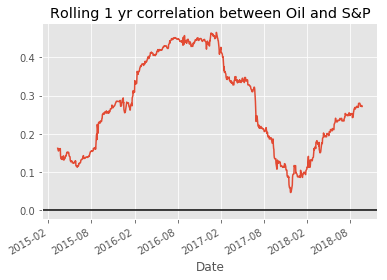

In [19]:
daily_returns = merged.pct_change()
daily_returns.es.rolling(window=252).corr(other=daily_returns.cl).dropna().plot()
plt.axhline(0, color='k')
title('Rolling 1 yr correlation between Oil and S&P')